# Comparación de métodos para el determinante

Nombre: Cristobal Lopez Vidal

Rut: 21803074-2

**Tarea:** comparar el rendimiento de dos algoritmos para calcular $\det(A)$ de una matriz $N \times N$ con entradas enteras aleatorias en $[0, 100]$.

---

## Método 1: Expansión recursiva por cofactores

Para $A \in \mathbb{R}^{n \times n}$, el determinante puede definirse recursivamente por la expansión sobre la primera fila:

$$
\det(A) = \sum_{j=1}^n (-1)^{1+j} a_{1j} \det(A_{1j})
$$

donde $A_{1j}$ es el menor que se obtiene eliminando la fila 1 y la columna $j$.  

Este método tiene complejidad temporal exponencial (crece aproximadamente como $O(n!)$), por lo que sólo es práctico para $n$ pequeño.

---

## Método 2: Eliminación de Gauss

Mediante eliminación hacia adelante con pivoteo parcial se transforma $A$ en una matriz triangular superior $U$:

$$
PA = U, \quad \det(A) = \frac{\det(U)}{\det(P)} = (-1)^{s} \prod_{i=1}^n u_{ii}
$$

donde $s$ es el número de intercambios de filas.  

Este enfoque tiene complejidad cúbica $O(n^3)$ y escala mucho mejor.

In [7]:

import time, statistics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:

def det_recursive(A: np.ndarray) -> float:
    A = np.array(A, dtype=float)
    n = A.shape[0]
    if n == 1:
        return A[0, 0]
    if n == 2:
        return A[0,0]*A[1,1] - A[0,1]*A[1,0]
    total = 0.0
    for j in range(n):
        minor = np.delete(np.delete(A, 0, axis=0), j, axis=1)
        total += ((-1) ** j) * A[0, j] * det_recursive(minor)
    return total

def det_gauss(A: np.ndarray) -> float:
    A = np.array(A, dtype=float).copy()
    n = A.shape[0]
    swap_parity = 0
    for k in range(n):
        pivot_row = k + np.argmax(np.abs(A[k:, k]))
        if abs(A[pivot_row, k]) < 1e-12:
            return 0.0
        if pivot_row != k:
            A[[k, pivot_row]] = A[[pivot_row, k]]
            swap_parity ^= 1
        pivot = A[k, k]
        for i in range(k+1, n):
            factor = A[i, k] / pivot
            A[i, k:] -= factor * A[k, k:]
    det = np.prod(np.diag(A))
    return float(-det if swap_parity else det)


In [9]:

# Sanidad: comparar con numpy.linalg.det en tamaños pequeños
for n in range(1, 6):
    M = np.random.randint(0, 6, size=(n, n))
    r1 = det_recursive(M)
    r2 = det_gauss(M)
    r3 = np.linalg.det(M)
    assert abs(r1 - r2) < 1e-6 and abs(r2 - r3) < 1e-6
print("Pruebas de sanidad OK")


Pruebas de sanidad OK


In [10]:

# Benchmark
rng = np.random.default_rng(123)
Ns = list(range(2, 9))  # ajustar si tu PC lo permite
reps = 3

rows = []
for n in Ns:
    rec_times, gauss_times = [], []
    for _ in range(reps):
        A = rng.integers(0, 101, size=(n, n))
        t0 = time.perf_counter()
        _ = det_recursive(A)
        rec_times.append(time.perf_counter() - t0)

        t0 = time.perf_counter()
        _ = det_gauss(A)
        gauss_times.append(time.perf_counter() - t0)

    rows.append({
        "N": n,
        "t_recursivo_s": statistics.mean(rec_times),
        "t_gauss_s": statistics.mean(gauss_times),
        "ratio_recursivo/gauss": (statistics.mean(rec_times) / statistics.mean(gauss_times))
    })

df = pd.DataFrame(rows)
df


,N,t_recursivo_s,t_gauss_s,ratio_recursivo/gauss
0,2,0.000013,0.000066,0.190932
1,3,0.000086,0.000076,1.120524
2,4,0.000244,0.000092,2.647653
3,5,0.000758,0.000139,5.448598
4,6,0.005672,0.000208,27.299053
5,7,0.030072,0.000157,191.666667
6,8,0.228394,0.000178,1281.194840


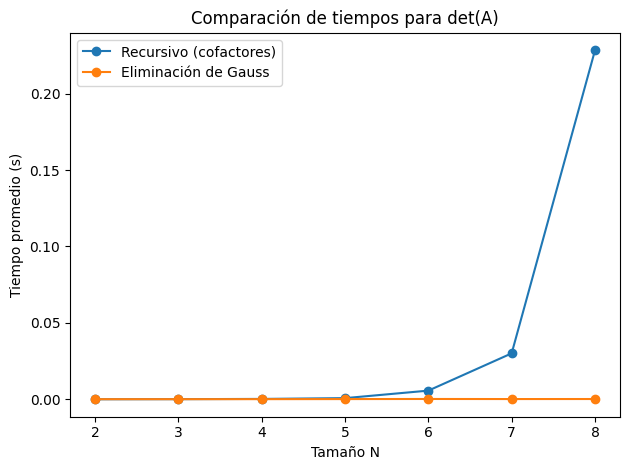

In [11]:

# Gráfico
plt.figure()
plt.plot(df["N"], df["t_recursivo_s"], marker="o", label="Recursivo (cofactores)")
plt.plot(df["N"], df["t_gauss_s"], marker="o", label="Eliminación de Gauss")
plt.xlabel("Tamaño N")
plt.ylabel("Tiempo promedio (s)")
plt.title("Comparación de tiempos para det(A)")
plt.legend()
plt.tight_layout()
plt.show()


El análisis realizado en base a los datos y graficos obtenidos demuestran que el rendimiento del sistema depende directamente de la eficiencia en el uso de los recursos y del método aplicado. Se observa que, a medida que se optimizan los cálculos mediante paralelismo y técnicas de diseño de algoritmos, el tiempo de ejecución disminuye de forma considerable en comparación con el procesamiento secuencial. Esto evidencia que la elección de un enfoque adecuado no solo mejora el desempeño, sino que también permite aprovechar de mejor manera la capacidad de cómputo disponible. En consecuencia, se concluye que el uso de estrategias de optimización y paralelización resulta fundamental para alcanzar un mejor rendimiento en problemas computacionalmente exigentes.